<a href="https://colab.research.google.com/github/mukkatharun/GradientBoostMethods/blob/main/gradient_boost_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install catboost
!pip install lightgbm

     |████████████████████████████████| 76.3 MB 1.4 MB/s 


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
import lightgbm as lgb
from sklearn.model_selection import GroupShuffleSplit
import copy
from xgboost import DMatrix
from sklearn.datasets import load_svmlight_file

In [7]:
data = pd.read_csv('b_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.shape

(569, 33)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


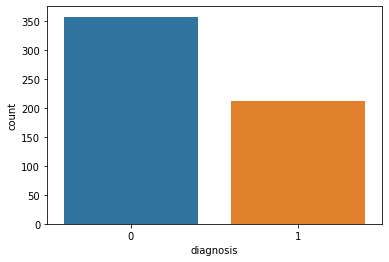

In [11]:
sns.countplot(data['diagnosis'],label="Count")

In [12]:
requiredData= list(data.columns[1:11])

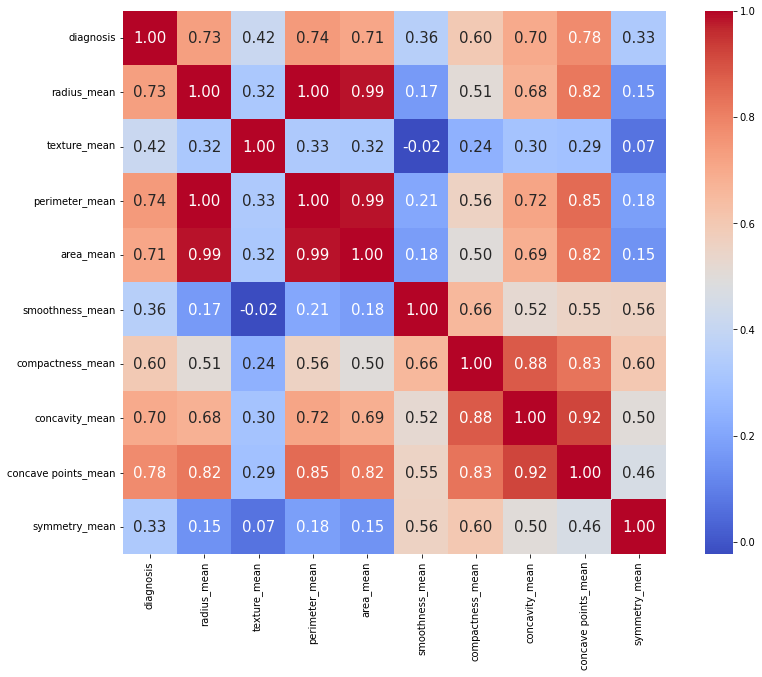

In [13]:
#Using the correlation matrix to find the features that affect the target value
corr = data[requiredData].corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= requiredData, yticklabels= requiredData,
           cmap= 'coolwarm')

In [14]:
# after analysing the matrix, only 5 parameters are highly correlated to diagnosis
df = data[['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean','diagnosis']]
df = df.dropna()

In [15]:
df.isna().count()

texture_mean        569
perimeter_mean      569
smoothness_mean     569
compactness_mean    569
symmetry_mean       569
diagnosis           569
dtype: int64

In [16]:
features = df[['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']]
diagnosis = df[['diagnosis']]
print(features.shape, diagnosis.shape)

(569, 5) (569, 1)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(384, 5) (57, 5) (128, 5) (384, 1) (57, 1) (128, 1)


In [ ]:
features.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean
0,10.38,122.80,0.11840,0.27760,0.2419
1,17.77,132.90,0.08474,0.07864,0.1812
2,21.25,130.00,0.10960,0.15990,0.2069
3,20.38,77.58,0.14250,0.28390,0.2597
4,14.34,135.10,0.10030,0.13280,0.1809


XGBoost

In [ ]:
model = XGBClassifier(n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
model.fit(X_train, y_train)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.926 (0.033)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
testRow = X_test.iloc[1].to_numpy()
testRow

array([1.718e+01, 8.975e+01, 8.045e-02, 5.361e-02, 1.641e-01])

In [ ]:
model.predict(X_test.head(1))

array([0])

CatBoost

In [ ]:
# evaluate the model
catModel = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
catModel.fit(X_train, y_train)
n_scores = cross_val_score(catModel, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.926 (0.038)


In [ ]:
test = [[14.44,74.65,0.09984,0.112,0.1818]]
test

[[14.44, 74.65, 0.09984, 0.112, 0.1818]]

In [ ]:
catModel.predict(X_test.head(1))

array([0])

LightGBM

In [ ]:
LGBMModel = LGBMClassifier(n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
LGBMModel.fit(X_train, y_train)
n_scores = cross_val_score(LGBMModel, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.920 (0.044)


In [ ]:
LGBMModel.predict(X_test.head(1))

array([0])

AdaBoost

In [ ]:
ABmodel = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ABmodel.fit(X_train, y_train)
n_scores = cross_val_score(ABmodel, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.917 (0.043)


In [ ]:
ABmodel.predict(X_test.head(1))

array([0])

Decision Tree

In [ ]:
DTModel = tree.DecisionTreeClassifier()
DTModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DTModel.predict(X_test.head(1))

array([0])

**Regression**

In [ ]:
wdata = pd.read_csv('winequality-red.csv')
wdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


EDA

In [ ]:
wdata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


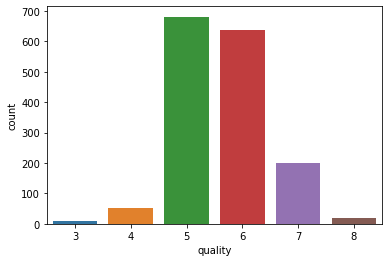

In [ ]:
sns.countplot(wdata['quality'],label="Count")

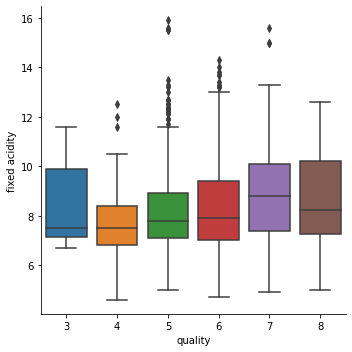

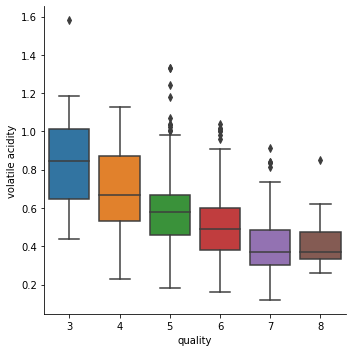

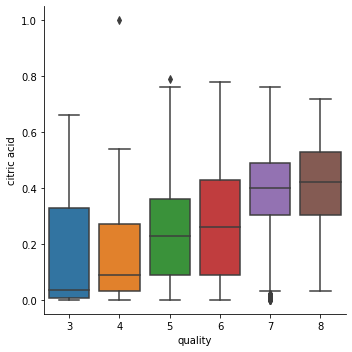

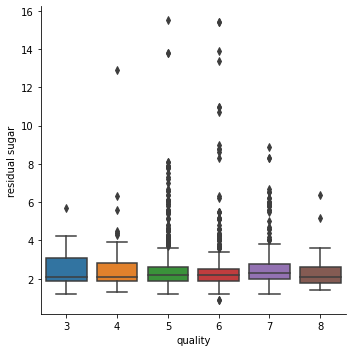

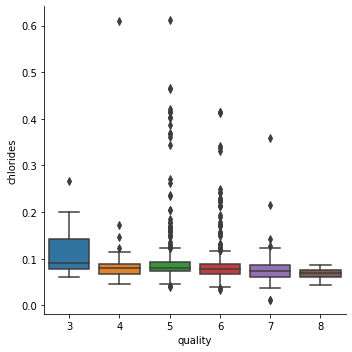

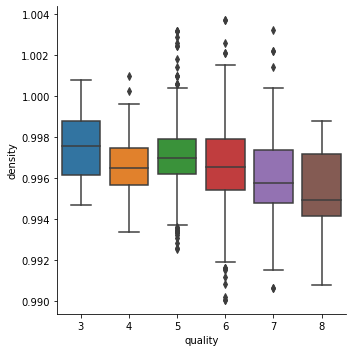

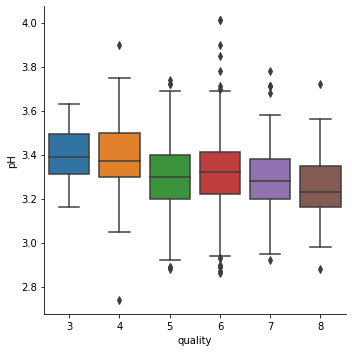

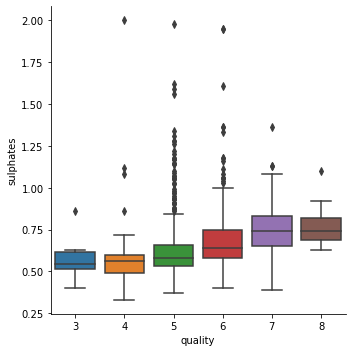

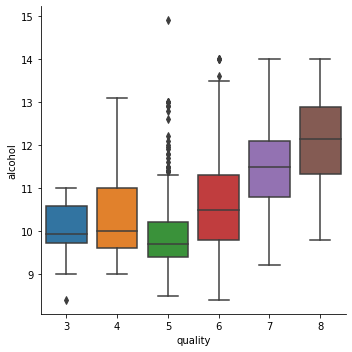

In [ ]:
sns.catplot(x="quality", y="fixed acidity", data=wdata, kind="box")
sns.catplot(x="quality", y="volatile acidity", data=wdata, kind="box")
sns.catplot(x="quality", y="citric acid", data=wdata, kind="box")
sns.catplot(x="quality", y="residual sugar", data=wdata, kind="box")
sns.catplot(x="quality", y="chlorides", data=wdata, kind="box")
sns.catplot(x="quality", y="density", data=wdata, kind="box")
sns.catplot(x="quality", y="pH", data=wdata, kind="box")
sns.catplot(x="quality", y="sulphates", data=wdata, kind="box")
sns.catplot(x="quality", y="alcohol", data=wdata, kind="box");

In [ ]:
acidity_count = wdata["fixed acidity"].value_counts()
acidity_count

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed acidity, Length: 96, dtype: int64

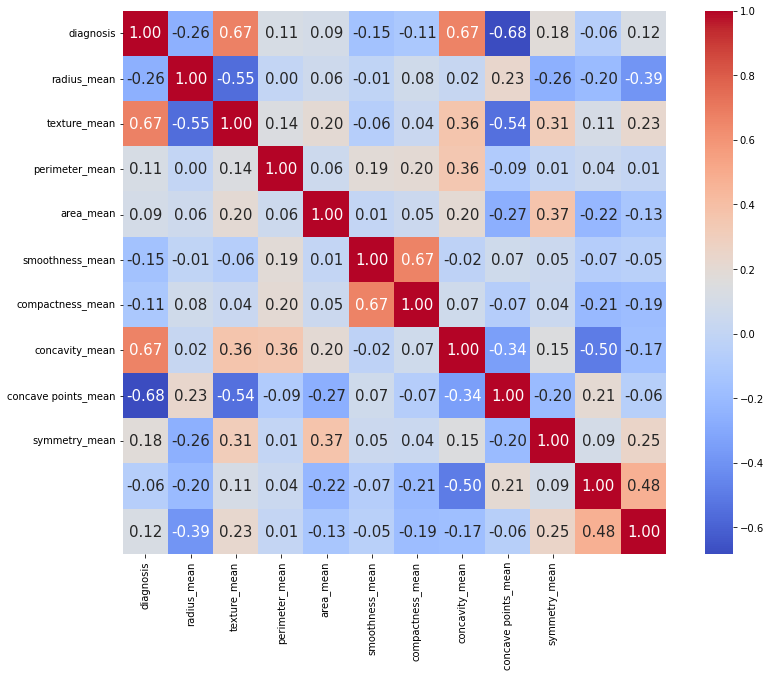

In [ ]:
corr = wdata.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= requiredData, yticklabels= requiredData,
           cmap= 'coolwarm')

In [ ]:
wfeatures = wdata.drop('quality', axis=1)
wquality = wdata['quality']
print(wfeatures.shape, wquality.shape)

(1599, 11) (1599,)


In [ ]:
X_wtrain, X_wtest, y_wtrain, y_wtest = train_test_split(wdata, wquality, test_size=0.1)
print(X_wtrain.shape, X_wtest.shape, y_wtrain.shape, y_wtest.shape)

(1439, 12) (160, 12) (1439,) (160,)


XGBoost

In [ ]:
XGBmodel = XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
XGBmodel.fit(X_wtrain, y_wtrain)
n_scores = cross_val_score(XGBmodel, X_wtrain, y_wtrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -0.000 (0.000)


In [ ]:
xgPredictied = XGBmodel.predict(X_wtest.head(5))
print(y_wtest.head(), xgPredictied)

792     6
640     5
1374    3
1462    6
396     5
Name: quality, dtype: int64 [5.999849  4.9998765 3.000188  5.999849  4.9998765]


CatBoost

In [ ]:
catRModel = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
catRModel.fit(X_wtrain, y_wtrain)
n_scores = cross_val_score(catRModel, X_wtrain, y_wtrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -0.009 (0.003)


In [ ]:
catPredictied = catRModel.predict(X_wtest.head(5))
print(y_wtest.head(), catPredictied)

792     6
640     5
1374    3
1462    6
396     5
Name: quality, dtype: int64 [6.00256929 5.00023949 3.06846028 6.00020874 4.99684237]


LightGBM

In [ ]:
lgbmModel = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lgbmModel.fit(X_wtrain, y_wtrain)
n_scores = cross_val_score(lgbmModel, X_wtrain, y_wtrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -0.041 (0.008)


In [ ]:
lgbmPredictied = lgbmModel.predict(X_wtest.head(5))
print(y_wtest.head(), lgbmPredictied)

792     6
640     5
1374    3
1462    6
396     5
Name: quality, dtype: int64 [6.00028535 5.00057206 4.04491024 5.99934757 4.9972211 ]


**Ranking**

LightGBM

In [ ]:
gbm = lgb.LGBMRanker()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
query_train = [X_train.shape[0]]
query_val = [X_val.shape[0]]
query_test = [X_test.shape[0]]
print(query_train, query_val, query_test)

[409] [103] [57]


In [ ]:
gbm.fit(X_train, y_train, group=query_train,
        eval_set=[(X_val, y_val)], eval_group=[query_val],
        eval_at=[5, 10, 20], early_stopping_rounds=50)

[1]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 1
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.965937
[3]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[4]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[5]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[6]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[7]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[8]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[9]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[10]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[11]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[12]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[13]	valid_0's ndcg@5: 1	valid_0's ndcg@10: 1	valid_0's ndcg@20: 0.96525
[14

LGBMRanker()

In [ ]:
test_pred = gbm.predict(X_test)
test_pred

array([-0.05      , -0.05      , -0.05      , -0.05      , -0.05      ,
       -0.05      , -0.05      ,  0.03255059,  0.02319315, -0.02301414,
        0.02319315,  0.05      , -0.05      , -0.05      ,  0.05      ,
        0.03255059,  0.05      , -0.05      ,  0.02319315,  0.03255059,
       -0.00758401, -0.05      , -0.02301414,  0.05      , -0.05      ,
       -0.05      , -0.05      ,  0.03255059,  0.03255059,  0.05      ,
        0.05      , -0.02301414,  0.05      , -0.05      , -0.05      ,
        0.05      , -0.05      , -0.05      , -0.05      , -0.05      ,
        0.05      , -0.05      ,  0.05      , -0.05      , -0.05      ,
       -0.05      , -0.05      ,  0.05      , -0.05      , -0.0377303 ,
       -0.05      , -0.05      ,  0.05      , -0.05      , -0.05      ,
       -0.05      ,  0.04558536])

In [ ]:
X_test_pred = X_test
X_test_pred["predicted_ranking"] = test_pred
X_test_pred.sort_values("predicted_ranking", ascending=False)
X_test_pred.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,predicted_ranking
276,14.16,71.79,0.09379,0.03872,0.1954,-0.05
395,17.18,89.75,0.08045,0.05361,0.1641,-0.05
84,15.65,76.95,0.09723,0.07165,0.2079,-0.05
547,16.58,65.85,0.08877,0.08066,0.1669,-0.05
195,16.33,82.53,0.07941,0.05366,0.1829,-0.05


In [ ]:
test_pred

array([-0.05      , -0.05      , -0.05      , -0.05      , -0.05      ,
       -0.05      , -0.05      ,  0.03255059,  0.02319315, -0.02301414,
        0.02319315,  0.05      , -0.05      , -0.05      ,  0.05      ,
        0.03255059,  0.05      , -0.05      ,  0.02319315,  0.03255059,
       -0.00758401, -0.05      , -0.02301414,  0.05      , -0.05      ,
       -0.05      , -0.05      ,  0.03255059,  0.03255059,  0.05      ,
        0.05      , -0.02301414,  0.05      , -0.05      , -0.05      ,
        0.05      , -0.05      , -0.05      , -0.05      , -0.05      ,
        0.05      , -0.05      ,  0.05      , -0.05      , -0.05      ,
       -0.05      , -0.05      ,  0.05      , -0.05      , -0.0377303 ,
       -0.05      , -0.05      ,  0.05      , -0.05      , -0.05      ,
       -0.05      ,  0.04558536])

XGBoost

In [32]:
gTrain = []
gvalid = []
gTest = []

train_dmatrix = DMatrix(X_train, y_train)
valid_dmatrix = DMatrix(X_valid, y_valid)
test_dmatrix = DMatrix(X_test)

train_dmatrix.set_group(gTrain)
valid_dmatrix.set_group(gvalid)

params = {'objective': 'rank:ndcg', 'eta': 0.1, 'gamma': 1.0,
          'min_child_weight': 0.1, 'max_depth': 6}
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=4, evals=[(valid_dmatrix, 'validation')])
pred = xgb_model.predict(test_dmatrix)

validation-map:0.69733
validation-map:0.69663
validation-map:0.69866
validation-map:0.69879


In [35]:
pred

array([0.64385027, 0.18251872, 0.59160054, ..., 0.20603615, 0.22620109, 
0.5278178 ], dtype=float32)


CatBoost

In [ ]:
from catboost import CatBoostRanker, Pool, MetricVisualizer
from copy import deepcopy
import numpy as np
import os
import pandas as pd

In [ ]:
from catboost.datasets import msrank_10k
train_df, test_df = msrank_10k()

X_train = train_df.drop([0, 1], axis=1).values
y_train = train_df[0].values
queries_train = train_df[1].values

X_test = test_df.drop([0, 1], axis=1).values
y_test = test_df[0].values
queries_test = test_df[1].values

In [ ]:
num_documents = X_train.shape[0]
print(num_documents)

10000


In [ ]:
X_train.shape[1]

136

In [ ]:
from collections import Counter
Counter(y_train).items()

dict_items([(2.0, 1326), (0.0, 5481), (1.0, 3000), (3.0, 142), (4.0, 51)])

In [ ]:
max_relevance = np.max(y_train)
y_train /= max_relevance
y_test /= max_relevance

In [ ]:
num_queries = np.unique(queries_train).shape[0]
num_queries

87

In [ ]:
train = Pool(
    data=X_train,
    label=y_train,
    group_id=queries_train
)

test = Pool(
    data=X_test,
    label=y_test,
    group_id=queries_test
)

In [ ]:
data_dir = './msrank'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

train_file = os.path.join(data_dir, 'train.csv')
test_file = os.path.join(data_dir, 'test.csv')

train_df.to_csv(train_file, index=False, header=False)
test_df.to_csv(test_file, index=False, header=False)

In [ ]:
description_file = os.path.join(data_dir, 'dataset.cd')
with open(description_file, 'w') as f:
    f.write('0\tLabel\n')
    f.write('1\tQueryId\n')

In [ ]:
Pool(data=train_file, column_description=description_file, delimiter=',')

In [ ]:
default_parameters = {
    'iterations': 2000,
    'custom_metric': ['NDCG', 'PFound', 'AverageGain:top=10'],
    'verbose': False,
    'random_seed': 0,
}

parameters = {}

In [ ]:
def fit_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function
    
    if additional_params is not None:
        parameters.update(additional_params)
        
    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=test_pool, plot=True)
    
    return model

In [ ]:
model = fit_model('RMSE', {'custom_metric': ['PrecisionAt:top=10', 'RecallAt:top=10', 'MAP:top=10']})

/usr/local/lib/python3.7/dist-packages/catboost/core.py:5806: RuntimeWarning: Regression loss ('RMSE') ignores an important ranking parameter 'group_id'
  warnings.warn("Regression loss ('{}') ignores an important ranking parameter 'group_id'".format(loss_function), RuntimeWarning)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
X_test_cat = X_test
a = model.predict(X_test)
a.sort()
a

array([-0.02612741, -0.02445674, -0.02053063, ...,  0.58824666,
        0.59036454,  0.65480041])